In [1]:
import numpy
import pandas
import sklearn
import matplotlib
import seaborn
import dash
import dash_bootstrap_components

print("¡Todas las bibliotecas principales se importaron correctamente!")

¡Todas las bibliotecas principales se importaron correctamente!


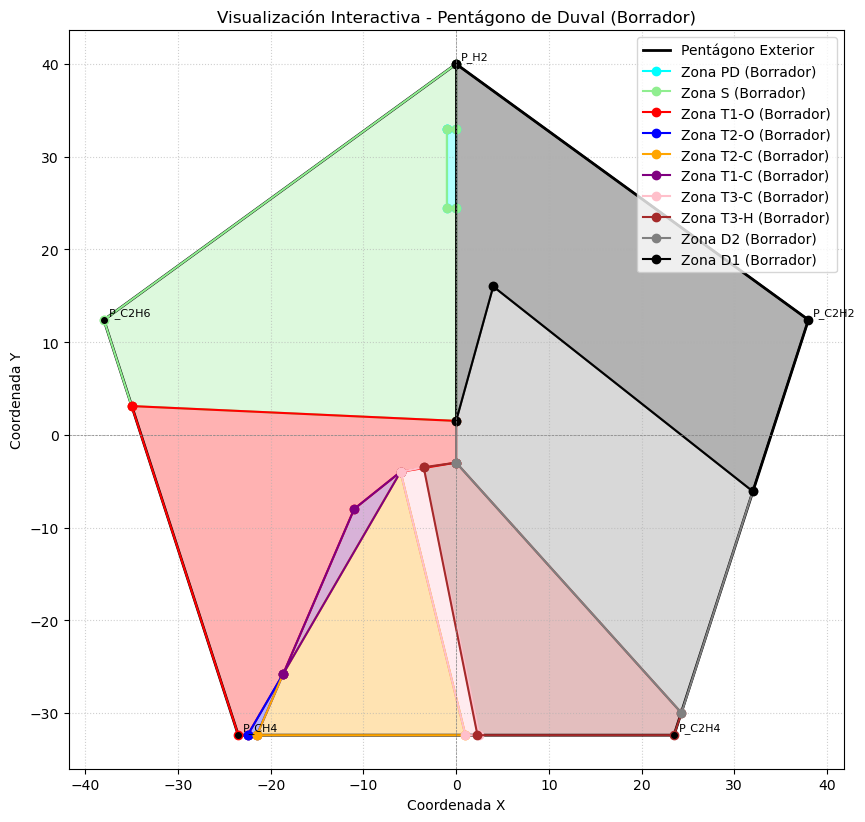

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# --- Vértices del Pentágono Exterior (Escala 40%) ---
P_H2 = (0, 40)
P_C2H6 = (-38, 12.4)
P_CH4 = (-23.5, -32.4)
P_C2H4 = (23.5, -32.4)
P_C2H2 = (38, 12.4)

pentagon_outer_vertices = [P_H2, P_C2H6, P_CH4, P_C2H4, P_C2H2, P_H2] # Añadir el primero al final para cerrar
x_outer, y_outer = zip(*pentagon_outer_vertices)

# --- Definiciones de Zonas (Borrador Inicial para Visualizar y Corregir) ---

# Zona 1: PD (Partial Discharge) - Rectángulo
zone_PD_vertices = [
    (-1, 33), (0, 33), (0, 24.5), (-1, 24.5),
    (-1, 33) # Cerrar polígono
]
x_pd, y_pd = zip(*zone_PD_vertices)

# Zona 2: S (Stray Gassing) - Polígono de 5 lados
zone_S_vertices = [
    (-38, 12.4),  # P_C2H6
    (-35, 3.1),   # K5
    (0, 1.5),     # K6
    (0, 24.5),    # K3 (frontera con PD)
    (-1, 24.5), 
    (-1, 33), 
    (0, 33),
    (0, 40),# K4 (frontera con PD)
    (-38, 12.4) # Cerrar polígono
]
x_s, y_s = zip(*zone_S_vertices)
zone_T1_O_vertices = [
    (-35, 3.1),  # P_C2H6
    (-23.5, -32.4),   # K5
    (-22.5, -32.4),
    (-18.64, -25.76),     # K6
    (-11, -8),    # K3 (frontera con PD)
    (-6, -4), 
    (0, -3), 
    (0, 1.5),
    (-35, 3.1) # Cerrar polígono
]
x_t1o, y_t1o = zip(*zone_T1_O_vertices)
zone_T2_O_vertices = [
    (-22.5, -32.4),
    (-21.5, -32.4),  # P_C2H6
    (-18.64, -25.76), 
    (-22.5, -32.4) # Cerrar polígono
]
x_t2o, y_t2o = zip(*zone_T2_O_vertices)
zone_T2_C_vertices = [
    (-21.5, -32.4),
    (-18.64, -25.76),
    (-6, -4),  # P_C2H6
    (1, -32.4), 
    (-21.5, -32.4) # Cerrar polígono
]
x_t2c, y_t2c = zip(*zone_T2_C_vertices)
zone_T3_C_vertices = [
    (-6,-4), 
    (-3.5, -3.5),  # P_C2H6
    (2.5, -32.4), 
    (1, -32.4),
    (-6,-4) # Cerrar polígono
]
x_t3c, y_t3c = zip(*zone_T3_C_vertices)
zone_T1_C_vertices = [
    (-18.64, -25.76),
    (-11, -8),  # P_C2H6
    (-6, -4), 
    (-18.64, -25.76) # Cerrar polígono
]
x_t1c, y_t1c = zip(*zone_T1_C_vertices)
zone_T3_H_vertices = [
    (-3.5, -3.5),
    (0, -3),  # P_C2H6
    (24.3, -30), 
    (23.5, -32.4),
    (2.3, -32.4),
    (-3.5, -3.5) # Cerrar polígono
]
x_t3h, y_t3h = zip(*zone_T3_H_vertices)
zone_D2_vertices = [
    (0, -3),  # P_C2H6
    (0, 1.5),  # P_C2H6
    (4, 16), 
    (32, -6.1),
    (24.3, -30),
    (0, -3) # Cerrar polígono
]
x_d2, y_d2 = zip(*zone_D2_vertices)
zone_D1_vertices = [
    (0, 40),
    (38, 12.4),  # P_C2H6
    (32, -6.1), 
    (4, 16),
    (0, 1.5),
    (0, 40) # Cerrar polígono
]
x_d1, y_d1 = zip(*zone_D1_vertices)
# --- Crear la Figura y los Ejes ---
fig, ax = plt.subplots(figsize=(10, 10)) # Puedes ajustar el tamaño

# Graficar el contorno del pentágono exterior
ax.plot(x_outer, y_outer, 'k-', label='Pentágono Exterior', linewidth=2)

# Graficar Zona PD
ax.plot(x_pd, y_pd, color='cyan', linestyle='-', marker='o', label='Zona PD (Borrador)')
ax.fill(x_pd, y_pd, color='cyan', alpha=0.3)

# Graficar Zona S
ax.plot(x_s, y_s, color='lightgreen', linestyle='-', marker='o', label='Zona S (Borrador)')
ax.fill(x_s, y_s, color='lightgreen', alpha=0.3)

# Graficar Zona T1_O
ax.plot(x_t1o, y_t1o, color='red', linestyle='-', marker='o', label='Zona T1-O (Borrador)')
ax.fill(x_t1o, y_t1o, color='red', alpha=0.3)

# Graficar Zona T2_O
ax.plot(x_t2o, y_t2o, color='blue', linestyle='-', marker='o', label='Zona T2-O (Borrador)')
ax.fill(x_t2o, y_t2o, color='blue', alpha=0.3)  

# Graficar Zona T2_C
ax.plot(x_t2c, y_t2c, color='orange', linestyle='-', marker='o', label='Zona T2-C (Borrador)')  
ax.fill(x_t2c, y_t2c, color='orange', alpha=0.3)    

# Graficar Zona T1_C
ax.plot(x_t1c, y_t1c, color='purple', linestyle='-', marker='o', label='Zona T1-C (Borrador)')          
ax.fill(x_t1c, y_t1c, color='purple', alpha=0.3)   

# Graficar Zona T3_C
ax.plot(x_t3c, y_t3c, color='pink', linestyle='-', marker='o', label='Zona T3-C (Borrador)')        
ax.fill(x_t3c, y_t3c, color='pink', alpha=0.3)

#Graficar Zona T3_H
ax.plot(x_t3h, y_t3h, color='brown', linestyle='-', marker='o', label='Zona T3-H (Borrador)')       
ax.fill(x_t3h, y_t3h, color='brown', alpha=0.3) 

# Graficar Zona D2
ax.plot(x_d2, y_d2, color='grey', linestyle='-', marker='o', label='Zona D2 (Borrador)')    
ax.fill(x_d2, y_d2, color='grey', alpha=0.3)

# Graficar Zona D1
ax.plot(x_d1, y_d1, color='black', linestyle='-', marker='o', label='Zona D1 (Borrador)')   
ax.fill(x_d1, y_d1, color='black', alpha=0.3)   
# --- Añadir Líneas de Referencia ---
# --- Puntos Clave de Referencia (para ayudar a visualizar y corregir) ---
# Puedes añadir más puntos clave aquí a medida que definamos más zonas
key_points_coords = {
    "P_H2": P_H2, "P_C2H6": P_C2H6, "P_CH4": P_CH4, "P_C2H4": P_C2H4, "P_C2H2": P_C2H2,
    
    # Añade más puntos K (K7 a K16) aquí si quieres verlos marcados
}

for name, (px, py) in key_points_coords.items():
    ax.text(px + 0.5, py + 0.5, name, fontsize=8) # Ajusta el offset del texto si es necesario
    ax.plot(px, py, 'ko', markersize=4)


# --- Configuración del Gráfico ---
ax.set_xlabel("Coordenada X")
ax.set_ylabel("Coordenada Y")
ax.set_title("Visualización Interactiva - Pentágono de Duval (Borrador)")
ax.axhline(0, color='grey', lw=0.5, linestyle='--')
ax.axvline(0, color='grey', lw=0.5, linestyle='--')
ax.grid(True, linestyle=':', alpha=0.6)
ax.legend()
ax.set_aspect('equal', adjustable='box') # ¡MUY IMPORTANTE para

In [8]:
def encontrar_interseccion_segmentos(p1, p2, p3, p4):
    """
    Encuentra el punto de intersección de dos segmentos de recta en 2D.
    Retorna el punto de intersección (x, y) o None si no se intersecan o son colineales/paralelas.

    Args:
        p1 (tuple): Punto de inicio del segmento 1 (x1, y1)
        p2 (tuple): Punto de fin del segmento 1 (x2, y2)
        p3 (tuple): Punto de inicio del segmento 2 (x3, y3)
        p4 (tuple): Punto de fin del segmento 2 (x4, y4)
    """
    x1, y1 = p1
    x2, y2 = p2
    x3, y3 = p3
    x4, y4 = p4

    # Denominador para las ecuaciones paramétricas
    # (y4 - y3) * (x2 - x1) - (x4 - x3) * (y2 - y1)
    denominador = (y4 - y3) * (x2 - x1) - (x4 - x3) * (y2 - y1)

    if denominador == 0:
        # Las líneas son paralelas o colineales
        # Para este caso simple, consideramos que no hay un único punto de intersección.
        # Se podría agregar una lógica más compleja para verificar la superposición de segmentos colineales.
        return None

    # Numerador para el parámetro tA (del segmento p1-p2)
    # (x4 - x3) * (y1 - y3) - (y4 - y3) * (x1 - x3)
    num_tA = (x4 - x3) * (y1 - y3) - (y4 - y3) * (x1 - x3)

    # Numerador para el parámetro tB (del segmento p3-p4)
    # (x2 - x1) * (y1 - y3) - (y2 - y1) * (x1 - x3)
    num_tB = (x2 - x1) * (y1 - y3) - (y2 - y1) * (x1 - x3)

    tA = num_tA / denominador
    tB = num_tB / denominador

    # Comprobamos si los parámetros tA y tB están entre 0 y 1 inclusive.
    # Si es así, la intersección ocurre dentro de ambos segmentos.
    # Se puede agregar una pequeña tolerancia (epsilon) para comparaciones de punto flotante si es necesario.
    # por ejemplo: -epsilon <= tA <= 1 + epsilon
    if 0 <= tA <= 1 and 0 <= tB <= 1:
        # Calculamos el punto de intersección usando tA
        punto_interseccion_x = x1 + tA * (x2 - x1)
        punto_interseccion_y = y1 + tA * (y2 - y1)
        return (punto_interseccion_x, punto_interseccion_y)
    else:
        # Las líneas se cruzan, pero no dentro de los segmentos definidos
        return None

# --- Ejemplo de Uso ---

# Segmento 1: de (1, 1) a (5, 5)
p1 = (-22.5, -32.4)
p2 = (-6, -4)

# Segmento 2: de (1, 5) a (5, 1)
p3 = (-21.5, -32.4)
p4 = (-11, -8)

interseccion = encontrar_interseccion_segmentos(p1, p2, p3, p4)

if interseccion:
    print(f"Los segmentos se intersectan en: {interseccion}")
else:
    print("Los segmentos no se intersectan (o son paralelos/colineales).")

# --- Otro Ejemplo: Sin intersección en los segmentos ---
p5 = (1, 1)
p6 = (2, 2)
p7 = (3, 3)
p8 = (4, 4) # Colineales, pero el segundo segmento empieza donde termina el primero (no se superponen con esta lógica)

interseccion2 = encontrar_interseccion_segmentos(p5, p6, p7, p8)
if interseccion2:
    print(f"Intersección ejemplo 2: {interseccion2}")
else:
    print("Ejemplo 2: Los segmentos no se intersectan.")


# --- Ejemplo 3: Líneas se cruzan, pero no los segmentos ---
p9 = (0,0)
p10 = (2,2)
p11 = (0,2)
p12 = (2,0)
# Estos sí se intersectan en (1,1) pero los segmentos los definiremos fuera
p10_mod = (0.5, 0.5) # Segmento 1 corto
p12_mod = (1.5, 0.5) # Segmento 2 no alcanza

interseccion3 = encontrar_interseccion_segmentos((0,0), (0.5,0.5), (0,2), (1.5,0.5))
if interseccion3:
    print(f"Intersección ejemplo 3: {interseccion3}")
else:
    print("Ejemplo 3: Los segmentos no se intersectan (aunque las líneas sí lo harían).")

# --- Ejemplo 4: Paralelas ---
p13 = (1,1)
p14 = (3,3)
p15 = (1,2)
p16 = (3,4)
interseccion4 = encontrar_interseccion_segmentos(p13,p14,p15,p16)
if interseccion4:
    print(f"Interseccion ejemplo 4: {interseccion4}")
else:
    print("Ejemplo 4: Los segmentos no se intersectan (paralelos).")

Los segmentos se intersectan en: (-18.64367816091954, -25.762452107279692)
Ejemplo 2: Los segmentos no se intersectan.
Ejemplo 3: Los segmentos no se intersectan (aunque las líneas sí lo harían).
Ejemplo 4: Los segmentos no se intersectan (paralelos).
